# Data Analysis for INST 204 Audit

This file is for playing with the data we will investigate in the audit. We can also use it to generate plots that we can put into the writeup. Feel free to modify the dataframe, but make sure to make a copy beforehand. I'm going to leave observations with missing data in because I think missing elements tell an important story in showing the flaws of the data.

In [1]:
# Import the required modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing and cleaning Data

In [40]:
# Read the data from the CSV file
base_df = pd.read_csv("cook_county_gang_data.csv")

# Change the column names to be shorter. This is to make the dataframe easier to work with
base_df = base_df.rename(
    {"Subject_ID": "subject_id", 
     "Subject_Sex": "sex", 
     "chicago": "town", 
     "address_state": "state", 
     "address_zip": "zipcode", 
     "Subject_Gang_ID": "gang_id",
     "Subject_Height": "height",
     "Subject_Weight": "weight",
     "Subject_Felon": "is_felon",
     "Subject_Probation": "on_probation",
     "Subject_Admits_Gang": "admits_gang",
     "Subject_Wears_Colors": "wears_colors",
     "Subject_Armed": "is_armed",
     "Subject_Race_ID": "race",
     "Subject_Eye_Color_ID": "eye_color",
     "Subject_Hair_Color_ID": "hair_color",
     "Subject_Create_Date": "record_creation_date",
     "Subject_Approved_Date": "record_approval_date",
     "Subject_Deceased": "is_deceased",
     "Has the individual been arrested in the company of known criminal gang members for offenses which are consistent with criminal gang activity?": "arrested_with_gang_members_for_suspected_gang_activity",
     "Has the individual been identified by an individual of proven reliability as a criminal gang member?": "gang_identified_by_known_gang_member",
     "Has the individual admitted membership in a criminal gang, and was this a credible self-admission made to a law enforcement officer or agent?": "admitted_gang_membership_to_law_enforcement",
     "Does the individual possess tattoos that a trained law enforcement officer or agent has reasonable suspicion to believe signify gang membership?": "has_gang_related_tattoos",
     "Does the individual reside in or frequent a particular criminal gang's area or affect their style of dress, use of hand signs, symbols, or maintain an ongoing relationship with known criminal gang members, and where the law enforcement officer documents reasonable suspicion that the individual is involved in criminal gang-related activity or enterprise?": "looks_like_gang_member",
     "Age as of 8/6/18": "age_in_2018"
    }, axis="columns")

# Fixing the binary columns to replace NaN with N/No (this will make analysis easier)
base_df["is_felon"] = base_df["is_felon"].fillna("N")
base_df["on_probation"] = base_df["on_probation"].fillna("N")
base_df["admits_gang"] = base_df["admits_gang"].fillna("N")
base_df["wears_colors"] = base_df["wears_colors"].fillna("N")
base_df["is_armed"] = base_df["is_armed"].fillna("N")
base_df["arrested_with_gang_members_for_suspected_gang_activity"] = base_df["arrested_with_gang_members_for_suspected_gang_activity"].fillna("No")
base_df["gang_identified_by_known_gang_member"] = base_df["gang_identified_by_known_gang_member"].fillna("No")
base_df["admitted_gang_membership_to_law_enforcement"] = base_df["admitted_gang_membership_to_law_enforcement"].fillna("No")
base_df["has_gang_related_tattoos"] = base_df["has_gang_related_tattoos"].fillna("No")
base_df["looks_like_gang_member"] = base_df["looks_like_gang_member"].fillna("No")

# Replace yes/no columns with boolean values
base_df["is_felon"] = base_df["is_felon"].replace({"Y": True, "N": False})
base_df["on_probation"] = base_df["on_probation"].replace({"Y": True, "N": False})
base_df["admits_gang"] = base_df["admits_gang"].replace({"Y": True, "N": False})
base_df["wears_colors"] = base_df["wears_colors"].replace({"Y": True, "N": False})
base_df["is_armed"] = base_df["is_armed"].replace({"Y": True, "N": False})
base_df["arrested_with_gang_members_for_suspected_gang_activity"] = base_df["arrested_with_gang_members_for_suspected_gang_activity"].replace({"Yes": True, "No": False})
base_df["gang_identified_by_known_gang_member"] = base_df["gang_identified_by_known_gang_member"].replace({"Yes": True, "No": False})
base_df["admitted_gang_membership_to_law_enforcement"] = base_df["admitted_gang_membership_to_law_enforcement"].replace({"Yes": True, "No": False})
base_df["has_gang_related_tattoos"] = base_df["has_gang_related_tattoos"].replace({"Yes": True, "No": False})
base_df["looks_like_gang_member"] = base_df["looks_like_gang_member"].replace({"Yes": True, "No": False})

# Display first 15 observations of dataframe for verification
base_df.head(15)

,subject_id,sex,town,state,zipcode,gang_id,height,weight,is_felon,on_probation,...,hair_color,record_creation_date,record_approval_date,is_deceased,arrested_with_gang_members_for_suspected_gang_activity,gang_identified_by_known_gang_member,admitted_gang_membership_to_law_enforcement,has_gang_related_tattoos,looks_like_gang_member,age_in_2018
0,6,M,Gary,IN,46409,FBJB Gang (Gary),603.0,300.0,False,False,...,Black,12/4/2017,12/4/2017,F,True,True,True,True,True,32.57
1,7,M,Gary,IN,46409,Vice Lords (People),506.0,140.0,False,True,...,Black,10/26/2017,10/26/2017,F,True,True,True,False,True,30.94
2,8,M,Gary,IN,46403,Vice Lords (People),510.0,170.0,False,False,...,Gray,3/28/2018,3/28/2018,F,True,True,True,False,True,64.40
3,10,M,Gary,IN,46408,Vice Lords (People),509.0,140.0,False,False,...,Black,3/29/2018,3/29/2018,F,True,True,False,False,True,53.37
4,11,M,Gary,IN,46408,Vice Lords (People),NaN,NaN,False,False,...,NaN,2/16/2016,6/24/2013,F,True,True,False,False,False,33.96
5,12,M,Gary,IN,46409,Vice Lords (People),NaN,NaN,False,False,...,Black,6/6/2017,6/24/2013,F,True,True,False,False,True,52.95
6,13,M,Gary,IN,46408,Vice Lords (People),504.0,130.0,False,False,...,Black,10/26/2017,10/26/2017,F,True,True,False,False,True,30.02
7,14,M,NaN,NaN,NaN,Vice Lords (People),NaN,NaN,False,False,...,Black,3/28/2018,3/28/2018,F,True,True,False,False,True,37.51
8,15,M,Gary,IN,46409,Vice Lords (People),600.0,190.0,False,False,...,Black,3/23/2015,6/24/2013,F,True,True,False,False,False,36.99
9,16,M,Merrillville,IN,46410,Vice Lords (People),505.0,240.0,True,True,...,Black,11/21/2017,11/21/2017,F,True,True,True,False,True,31.71


## Analysis

Here are some ideas I have for things we could look at that I haven't done yet:

* Distribution of how long subjects have been in the database (subtract the day the subject was entered/approved from the day the ages were added: August 6, 2018)
* Two-way frequency table of race and gender
* Proportions of people who are felons or not (we could also do this for probation)
* Bar graph for locations

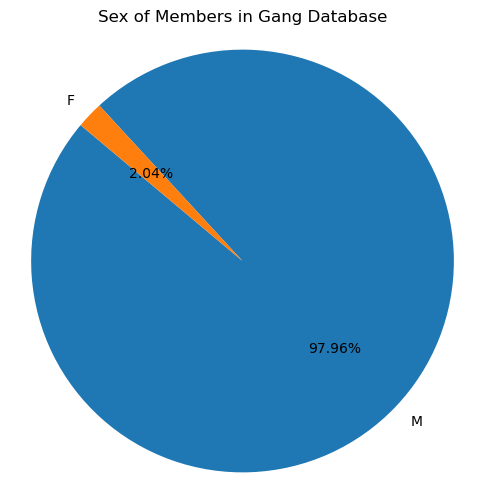

In [30]:
# Gender pie chart
sex_counts = base_df["sex"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Sex of Members in Gang Database")
plt.axis("equal")
plt.show()

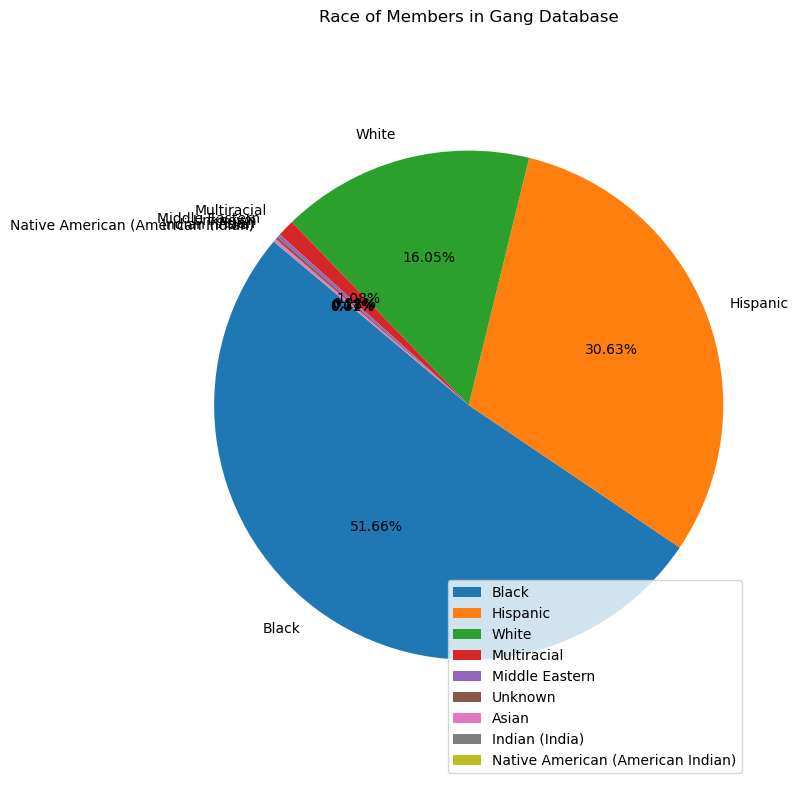

In [31]:
# Race pie chart
race_counts = base_df["race"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct="%.2f%%", startangle=140)
plt.title("Race of Members in Gang Database")
plt.legend(loc="best")
plt.axis("equal")
plt.tight_layout()
plt.show()

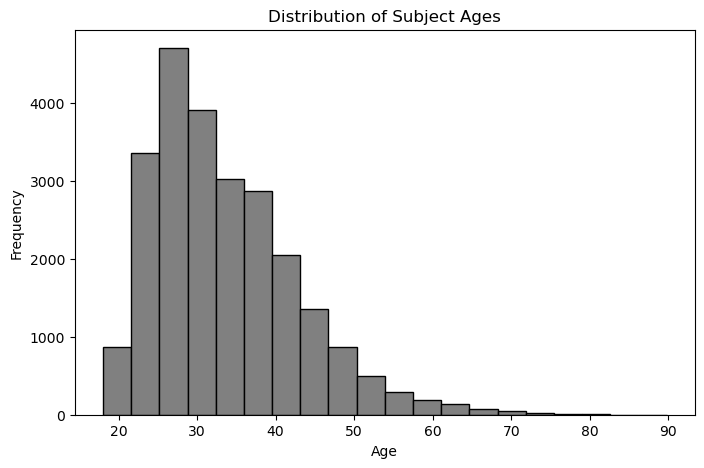

count    24299.000000
mean        33.560112
std          9.195676
min         18.010000
25%         26.600000
50%         31.640000
75%         38.860000
max         89.780000
Name: age_in_2018, dtype: float64

In [33]:
# Age histogram
plt.figure(figsize=(8, 5))
plt.hist(base_df['age_in_2018'], bins=20, color='grey', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Subject Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
base_df["age_in_2018"].describe()

In [ ]:
# Gender and race two-way table